In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [2]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
IMAGE_SIZE=256
BATCH_SIZE=31
CHANNELS=3
EPOCHS=30

In [4]:
#loading the data
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

70

(31, 256, 256, 3)
[0 0 2 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1]


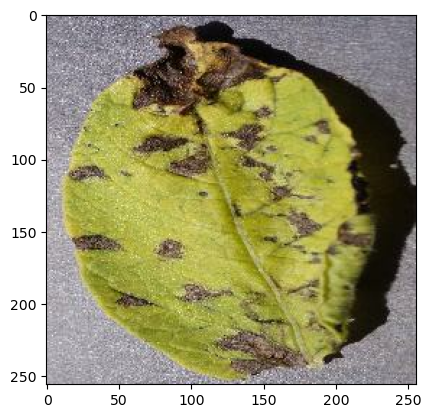

In [7]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    print(image_batch.shape)
    print(label_batch.numpy())

In [8]:
train_size=0.8
len(dataset)*train_size

56.0

In [9]:
train_ds=dataset.take(56)
len(train_ds)

56

In [10]:
test_ds=dataset.skip(56)
len(test_ds)

14

In [11]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [12]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [13]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    
    
    return train_ds,val_ds,test_ds

In [14]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [15]:
len(train_ds)

56

In [16]:

train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [17]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE)
    #layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [18]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [19]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes,activation="softmax")
])
model.build(input_shape=input_shape)

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (31, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [21]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]

)

In [22]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds


)

Epoch 1/30
56/56 [==============================] - 69s 1s/step - loss: 1.2758 - accuracy: 0.5444 - val_loss: 0.7488 - val_accuracy: 0.6959
Epoch 2/30
56/56 [==============================] - 61s 1s/step - loss: 0.5545 - accuracy: 0.7846 - val_loss: 0.4371 - val_accuracy: 0.8295
Epoch 3/30
56/56 [==============================] - 58s 1s/step - loss: 0.3846 - accuracy: 0.8462 - val_loss: 0.2557 - val_accuracy: 0.9078
Epoch 4/30
56/56 [==============================] - 60s 1s/step - loss: 0.2922 - accuracy: 0.8825 - val_loss: 0.2389 - val_accuracy: 0.8848
Epoch 5/30
56/56 [==============================] - 63s 1s/step - loss: 0.2750 - accuracy: 0.8946 - val_loss: 0.2216 - val_accuracy: 0.8756
Epoch 6/30
56/56 [==============================] - 60s 1s/step - loss: 0.1897 - accuracy: 0.9274 - val_loss: 0.2123 - val_accuracy: 0.8940
Epoch 7/30
56/56 [==============================] - 63s 1s/step - loss: 0.1747 - accuracy: 0.9372 - val_loss: 0.3321 - val_accuracy: 0.8802
Epoch 8/30
56/56 [==

In [24]:
scores=model.evaluate(test_ds)

7/7 [==============================] - 2s 252ms/step - loss: 0.1588 - accuracy: 0.9309


In [25]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]

loss=history.history["loss"]
val_loss=history.history["val_loss"]

first image to predict
 actual label Potato___Early_blight
1/1 [==============================] - 2s 2s/step
predicted label Potato___Early_blight


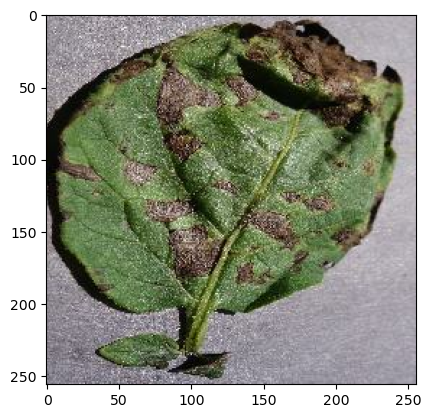

In [26]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype("uint8")
    first_label=labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print(" actual label",class_names[first_label])
    
    batch_prediction=model.predict(images_batch)
    print("predicted label",class_names[np.argmax(batch_prediction[0])])

In [27]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    
    return predicted_class,confidence

1/1 [==============================] - 0s 47ms/step


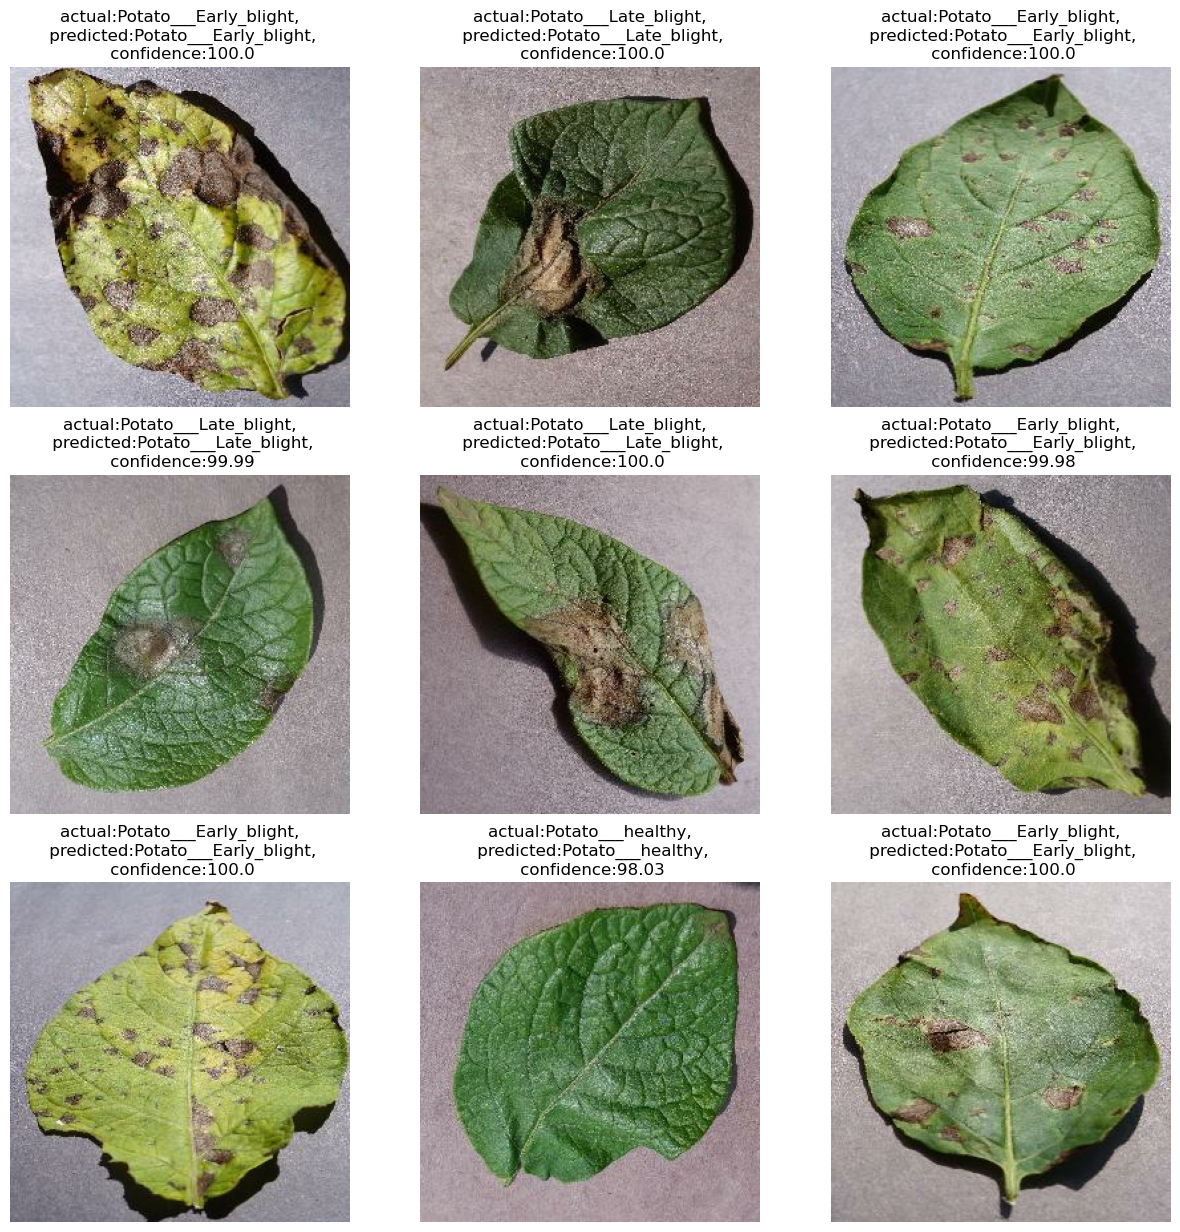

In [31]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"actual:{actual_class},\n predicted:{predicted_class},\n confidence:{confidence}")
        
        plt.axis("off")

In [41]:
import os
model_version=max([int(i) for i in os.listdir("../models")+[0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/4\assets


INFO:tensorflow:Assets written to: ../models/4\assets
